In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#### Define the Parameters of the Beam

In [2]:
# Define parameters
L = 1.0       # Beam length
EI = 1.0      # Flexural rigidity
n_points = 50 # Number of points for training
epochs = 5000 # Training epochs


#### Define the Training data( Datapoints spanning between 0-L)

In [3]:
# Generate training data
x = np.linspace(0, L, n_points).reshape(-1,1)
x.shape
xt=tf.convert_to_tensor(x)
#xt= Input variables that were converted to tensor form
print(xt[0])

tf.Tensor([0.], shape=(1,), dtype=float64)


In [4]:
# Load function
# we are applying a constant load of 1 kN/m
def load(x):
    
    #return -1000 * (1 - tf.math.cos(2 * np.pi * x))
    return -1.0* (tf.constant(1.0,shape= x.shape, dtype=tf.float64))


#### Defining the Load function

In [5]:
tf.random.set_seed(123) 
# random number is used inorder to initiate the weights and bias 
# random seed is given inorder generate same sequence of random numbers so that even 
#if same code is run multiple times the results will be same
# seed amke to geenrate same sequence of random numbers needed


#### Model parameters defination

In [6]:
model=Sequential(
[
    tf.keras.Input(shape=(1,)),
    Dense(20,activation='tanh',name='L1'),
    Dense(20,activation='tanh',name='L2'),
    Dense(20,activation='tanh',name='L3'),
    Dense(20,activation='tanh',name='L4'),
    Dense(20,activation='tanh',name='L5'),
    Dense(1,activation='tanh',name='L6')
])

# Initially it was solved usign ReLU function but all the gradients were Zero 
# Sigmoid function was also used , but the learning was so slow
#tanh was better so that we could get better results and tap the non linear behaviour

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 20)                40        
                                                                 
 L2 (Dense)                  (None, 20)                420       
                                                                 
 L3 (Dense)                  (None, 20)                420       
                                                                 
 L4 (Dense)                  (None, 20)                420       
                                                                 
 L5 (Dense)                  (None, 20)                420       
                                                                 
 L6 (Dense)                  (None, 1)                 21        
                                                                 
Total params: 1,741
Trainable params: 1,741
Non-trainabl

#### Defining the Gradient and loss fucntion

In [8]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

#loss_eq= loss function calculated based on the generalised equation
#loss_u= loss function calcualted based on the boundary conditions
#dl_dx= First gradient of the Y w.r.t Xt


#tape.watch(xt)= This statement allows to do differentiation on the watched variables
#By default only the trainable parameteres will be watched 

# Training loop
for epoch in range(epochs):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(xt)
        y_pred = model(xt)
        dl_dx=tape.gradient(y_pred,xt)
        dl_dx2=tape.gradient(dl_dx,xt)
        dl_dx3=tape.gradient(dl_dx2,xt)
        dl_dx4=tape.gradient(dl_dx3,xt)
        loss_eq=tf.reduce_mean(tf.square(dl_dx4-load(xt)))
        loss_u=tf.reduce_mean(tf.square(tf.cast(y_pred[0], tf.float64)) + tf.square(tf.cast(dl_dx[0], tf.float64)))
        loss=loss_eq+loss_u
        
        
    gradients = tape.gradient(loss, model.trainable_variables)
    # Trainable variables= the varaible sof w, b in all the Neurons
    
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    # The abover function updates all the trainable variable basedon the gradients 
    # ZIP function create a tuples, of two input variables
    if epoch % 500 == 0:
        print(f'Epoch: {epoch}, Loss: {loss.numpy()}')



Epoch: 0, Loss: 2.5096597358106694
Epoch: 500, Loss: 0.0014758828315092271
Epoch: 1000, Loss: 0.00012047177453608659
Epoch: 1500, Loss: 2.4114925318237112e-05
Epoch: 2000, Loss: 2.0414268486739217e-05
Epoch: 2500, Loss: 1.9085969597476548e-05
Epoch: 3000, Loss: 1.8152490018978897e-05
Epoch: 3500, Loss: 1.6885512173843154e-05
Epoch: 4000, Loss: 1.587683536489415e-05
Epoch: 4500, Loss: 1.4846058524256023e-05


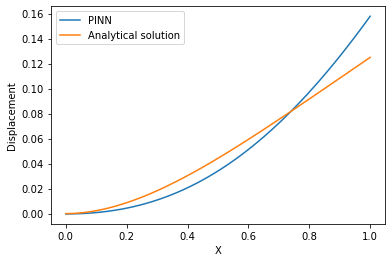

In [19]:
# Analytical solution of cantilever beam

y_cant=(tf.pow(xt,4)+6*L*L*tf.pow(xt,2)-4*L*tf.pow(xt,3))/24
plt.plot(xt,y_pred,label='PINN')
plt.plot(xt,y_cant,label='Analytical solution')
plt.legend()
_=plt.xlabel('X')
_=plt.ylabel('Displacement')



tf.Tensor(
[[-2.39342451e-04]
 [-1.94594264e-04]
 [-6.52819872e-05]
 [ 1.53705478e-04]
 [ 4.66972502e-04]
 [ 8.79540690e-04]
 [ 1.39586534e-03]
 [ 2.02008802e-03]
 [ 2.75669270e-03]
 [ 3.60950734e-03]
 [ 4.58265608e-03]
 [ 5.67960553e-03]
 [ 6.90364279e-03]
 [ 8.25845264e-03]
 [ 9.74716619e-03]
 [ 1.13727152e-02]
 [ 1.31375957e-02]
 [ 1.50449825e-02]
 [ 1.70969088e-02]
 [ 1.92959793e-02]
 [ 2.16440558e-02]
 [ 2.41434257e-02]
 [ 2.67955549e-02]
 [ 2.96020098e-02]
 [ 3.25643234e-02]
 [ 3.56839523e-02]
 [ 3.89617607e-02]
 [ 4.23985273e-02]
 [ 4.59952652e-02]
 [ 4.97523025e-02]
 [ 5.36702946e-02]
 [ 5.77491894e-02]
 [ 6.19890541e-02]
 [ 6.63899332e-02]
 [ 7.09513500e-02]
 [ 7.56727532e-02]
 [ 8.05538967e-02]
 [ 8.55933726e-02]
 [ 9.07905698e-02]
 [ 9.61443186e-02]
 [ 1.01653241e-01]
 [ 1.07315674e-01]
 [ 1.13130033e-01]
 [ 1.19094513e-01]
 [ 1.25206709e-01]
 [ 1.31464928e-01]
 [ 1.37866378e-01]
 [ 1.44408688e-01]
 [ 1.51089132e-01]
 [ 1.57904699e-01]], shape=(50, 1), dtype=float32)
